# Case study on Supervised learning

Do the following in the iris dataset.

    1. Read the dataset to the python environment.

    2. Do necessary pre-processing steps.

    3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### Import packages

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Import Dataset

In [96]:
data=pd.read_excel("iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

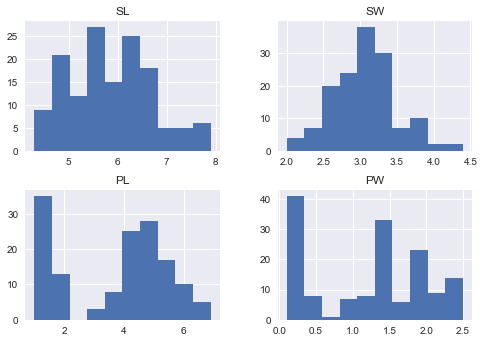

In [97]:
data.hist()

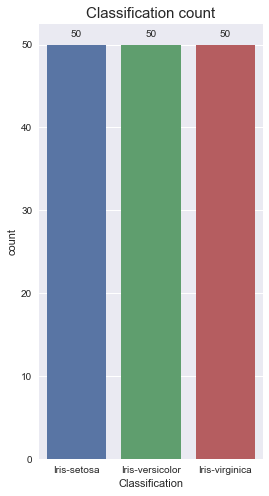

In [98]:
plt.figure(figsize=(4, 8))
plt.style.use("seaborn")
ax = sns.countplot(x="Classification",data=data)
plt.title("Classification count",size=15);
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Do necessary pre-processing steps.

In [99]:
data.shape

(150, 5)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This is the iris dataset.
     
    There are 4 features and 150 samples in the data set. 
    There are null values for SL(Sepal Length), SW(Sepal Width), PL (Petal Length) features
    The Classification feature is of object datatype , this need to be encoded

In [101]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check null values

In [102]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values for SL(Sepal Length), SW(Sepal Width), PL (Petal Length) features, this need to be filled.

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

<Figure size 1440x864 with 0 Axes>

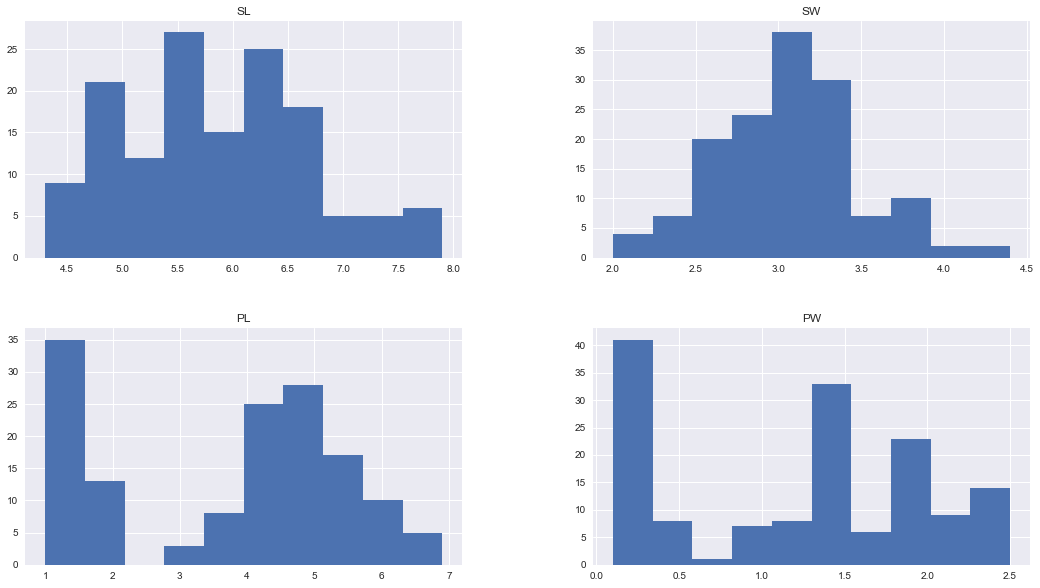

In [103]:
plt.figure(figsize=(20, 12))
data.hist(figsize=(18, 10))

<AxesSubplot:>

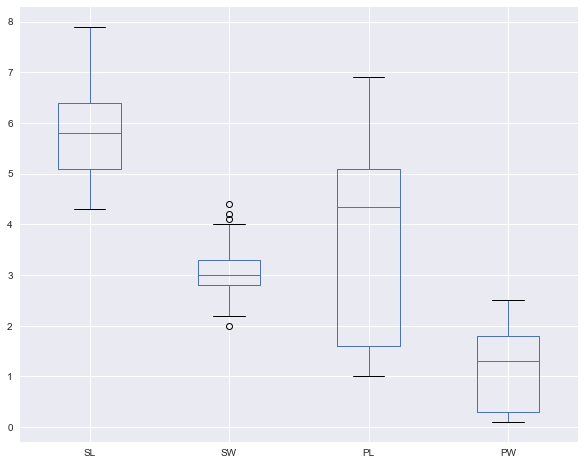

In [104]:
plt.figure(figsize=(10, 8))
data.boxplot()

<AxesSubplot:>

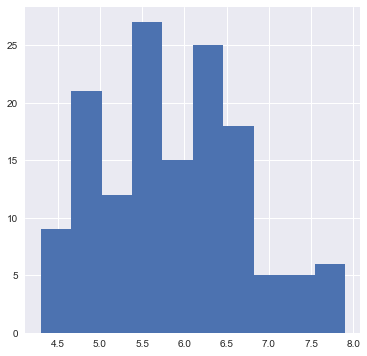

In [105]:
data['SL'].hist(figsize=(6, 6))

In [106]:
#Filling missing values for SL column

In [107]:
data['SL']=data['SL'].fillna(data['SL'].median())

<AxesSubplot:>

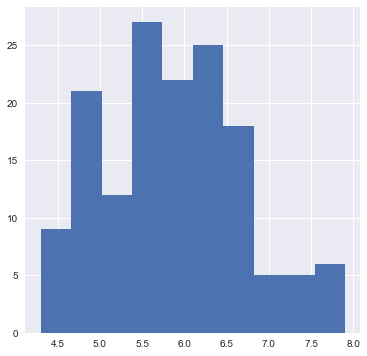

In [108]:
data['SL'].hist(figsize=(6, 6))

In [109]:
data.isnull().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Missing values in Sl feature is filled with Median value of SL 

In [110]:
#Filling missing values for SW column

<AxesSubplot:>

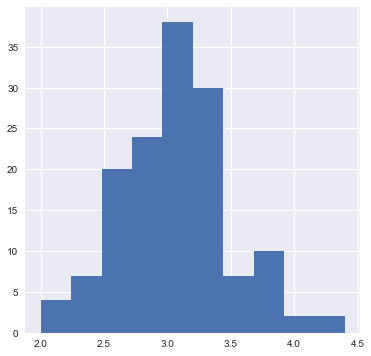

In [111]:
data['SW'].hist(figsize=(6, 6))

In [112]:
data['SW']=data['SW'].fillna(data['SW'].mean())

In [113]:
data.isnull().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

Missing values in SW feature is filled with Mean value of SW

In [114]:
#Filling missing values for PL column

<AxesSubplot:>

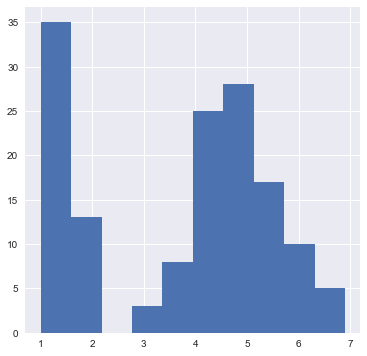

In [115]:
data['PL'].hist(figsize=(6, 6))

In [116]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [117]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Missing values in PL feature is filled with Median value of PL as the value is not normally distributed 

### Check outliners in the dataset

<AxesSubplot:>

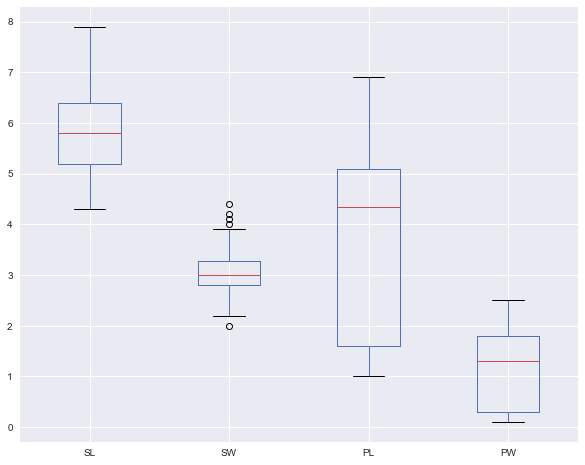

In [118]:
plt.figure(figsize=(10, 8))
data.boxplot()

In [119]:
# Checking outlines in SW feature

Text(0.5, 1.0, 'Box plot of SW')

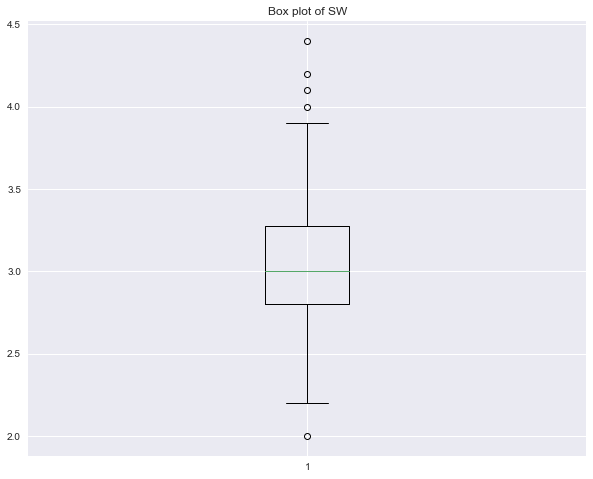

In [120]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [121]:
#Finding the percentiles and interquadrilerange (IQR)

In [122]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)

Q1- 2.8
Q2- 3.0
Q3- 3.25


In [123]:
data['SW'].median()

3.0

In [124]:
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)

IQR- 0.4500000000000002


In [125]:
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)

low_limit- 2.1249999999999996
upper_limit- 3.9250000000000003


In [126]:
# Finding the outliners based on the upper an lower limit

In [127]:
out = pd.DataFrame()
out['outlier'] = data[(data['SW']<low_limit) | (data['SW']>upper_limit)]['SW']

In [128]:
out

,outlier
14,4.0
15,4.4
32,4.1
33,4.2
60,2.0


In [129]:
# Removing the ouliners

In [130]:
ind1= (data['SW']<low_limit) | (data['SW']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

In [131]:
data.shape

(145, 5)

Text(0.5, 1.0, 'Box plot of SW')

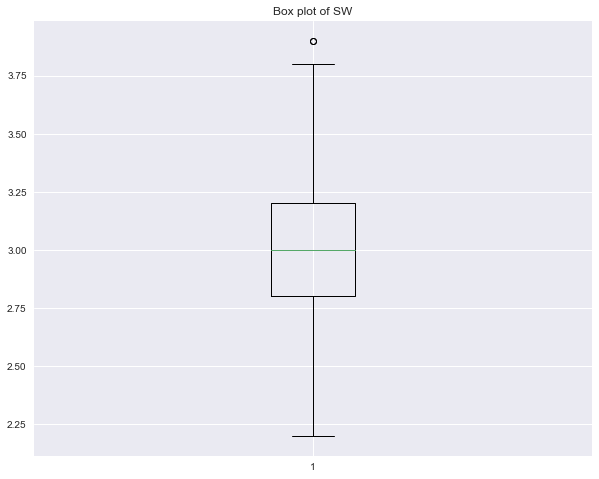

In [132]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

The ouliners in SW feature is now removed

### Do label encoding for Classification column

In [133]:
data["Classification"].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder 

In [135]:
le = LabelEncoder()

In [136]:
data["Classification"] = le.fit_transform(data["Classification"])

In [137]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [138]:
data["Classification"].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

The classification feature is now label encoded withnvalues 1,2 and 3

## Predict the Classification feature for the Iris dataset

### LogisticRegression

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
y = data["Classification"]
X = data.drop(["Classification"], axis=1)
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [141]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
lr = linear_model.LogisticRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

/Users/bilalaliyar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
confusion_matrix(y_test, predictions)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [144]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.73      0.89      0.80         9
           2       0.92      0.86      0.89        14

    accuracy                           0.89        37
   macro avg       0.88      0.89      0.88        37
weighted avg       0.90      0.89      0.90        37



In [145]:
print("Accuracy:",accuracy_score(y_test, predictions))

Accuracy: 0.8918918918918919


### KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
# Identifty the best values for n_neighbors

In [150]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    #confusion_matrix(y_test, predictions)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

Text(0, 0.5, 'Accuracy')

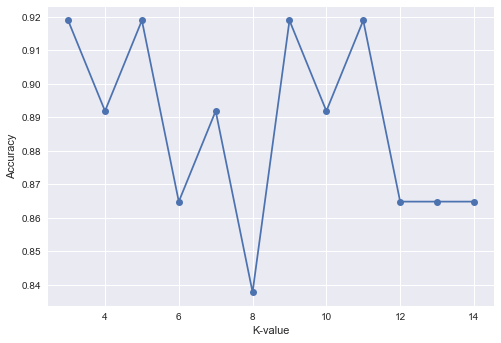

In [151]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

The maximun performance for the KNN model is when the n_neighbors value is 3,5,9 and 11 

In [152]:
#Use GridSearch to find the best hyperparameters values

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [155]:

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 3


In [156]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=3,metric="minkowski",p=2)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]])

In [157]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.80      0.89      0.84         9
           2       0.93      0.93      0.93        14

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



The best Accuracy level for KNN nodel is 92%

### SVM

In [158]:
from sklearn.svm import SVC

In [159]:
clf = SVC(kernel='linear') 

In [160]:
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)

In [161]:
confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [162]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      0.89      0.84         9
           2       0.92      0.86      0.89        14

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



In [163]:
print("Accuracy:",accuracy_score(y_test, predictions))

Accuracy: 0.918918918918919


In [164]:
#### The Accuracy of the Model is to 92

In [165]:
clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13  1  0]
 [ 0  8  1]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.67      0.89      0.76         9
           2       0.92      0.79      0.85        14

    accuracy                           0.86        37
   macro avg       0.86      0.87      0.86        37
weighted avg       0.89      0.86      0.87        37



The best Accuracy level for KNN model is 92%

### Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
dclf = DecisionTreeClassifier()

In [168]:
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [169]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      0.89      0.84         9
           2       0.92      0.86      0.89        14

    accuracy                           0.92        37
   macro avg       0.91      0.92      0.91        37
weighted avg       0.92      0.92      0.92        37



The Accuracy level for Decision Tree model is 92%

### Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
nmclf=RandomForestClassifier(n_estimators=50)

In [172]:
model = nmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]])

In [173]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.89      0.89         9
           2       0.93      0.93      0.93        14

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



The Randon Forest shows a better accuracy of 95%

### Apply Standard Scaling

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [175]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [176]:
model = nmclf.fit(X_train,y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 13]])

In [178]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.93      0.96        14

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



#### After Standard scaling the Accuracy of the Random Forest model improved to  97%

In [179]:
clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[14  0  0]
 [ 0  8  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.97        14

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.97      0.97      0.97        37



#### The Accuracy of the SVC Model also increased to 97 after applying standard scaling. There is only one misclassified item